<a href="https://colab.research.google.com/github/Tecindes/ClasificacionValidacion/blob/main/IAAumentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


# Optimización Aeropuertaria


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
datos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')
datos.shape

(71175, 11)

In [5]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [6]:
print(round(.205981*60)) # 70.20 70 minutos .20 segundos que deben convertirse es sobre 60 no sobre 10
print(round(.885071*60)) # 8.88 8 horas .88 minutos que deben convertirse es sobre 60 no sobre 10


12
53


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [8]:
datos.describe() # variables númericas

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [9]:
datos.describe(include='O') # variables categoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [10]:
# para graficar
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
avg_delay=datos.groupby('airline')['delay'].mean()
avg_delay

,delay
airline,
BZ,3.077595
MM,40.498007
YE,25.772248


In [12]:
avg_delay=datos.groupby('airline')['delay'].mean().reset_index()
avg_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


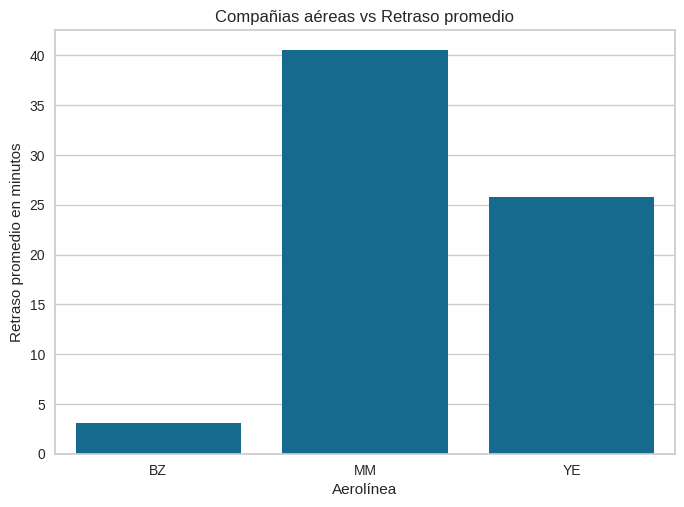

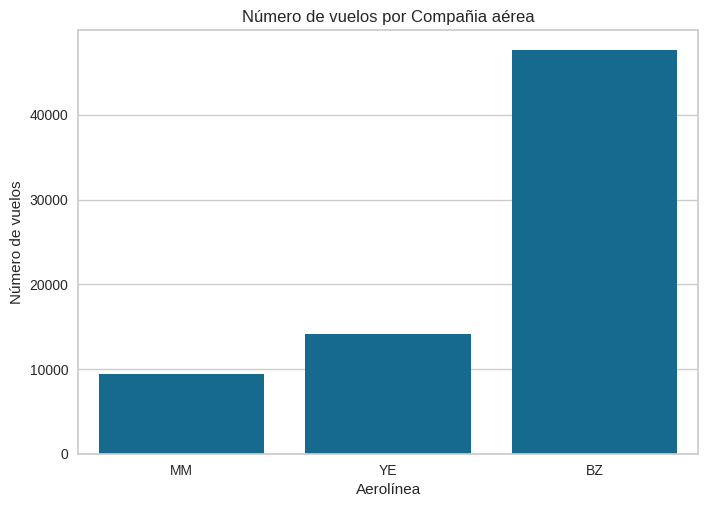

In [13]:
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañias aéreas vs Retraso promedio')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañia aérea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()

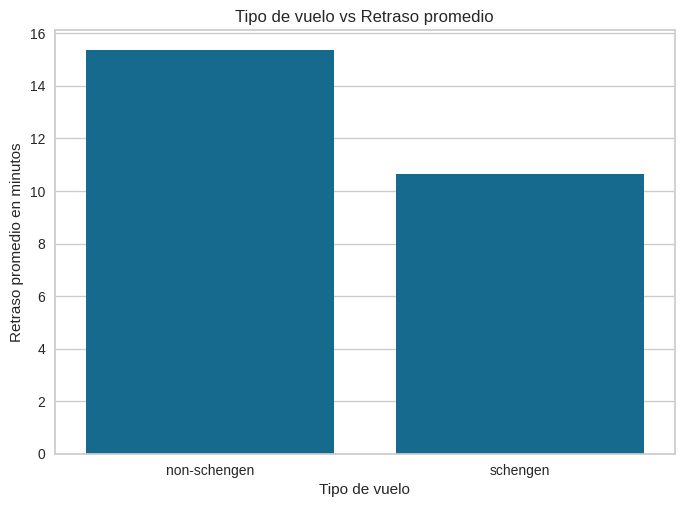

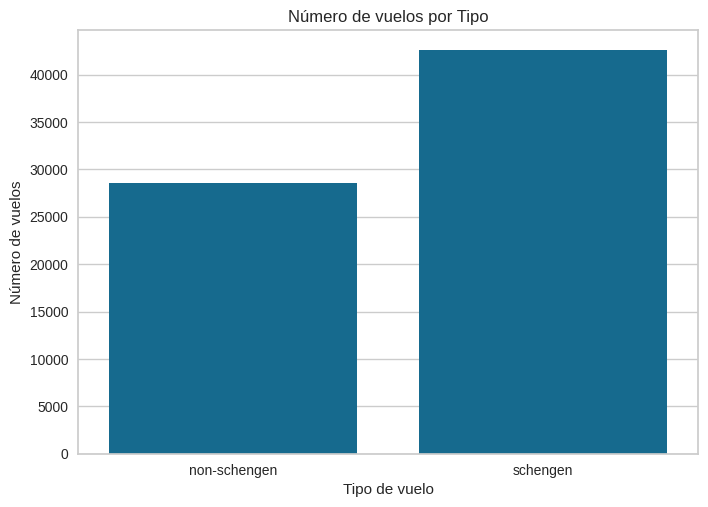

In [14]:
avg_delay=datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs Retraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

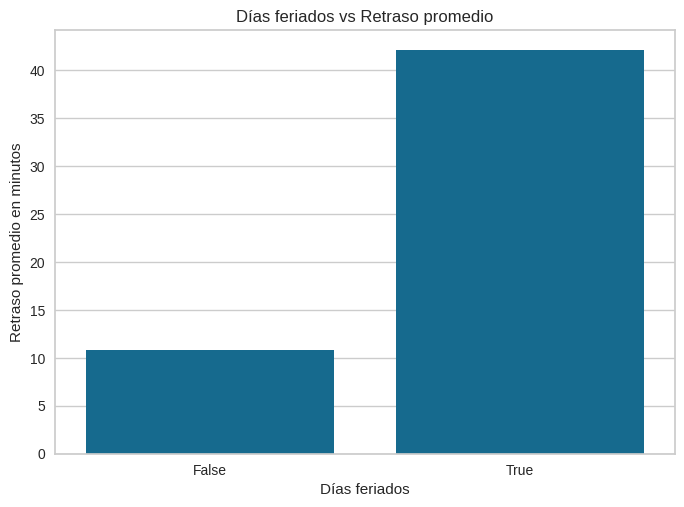

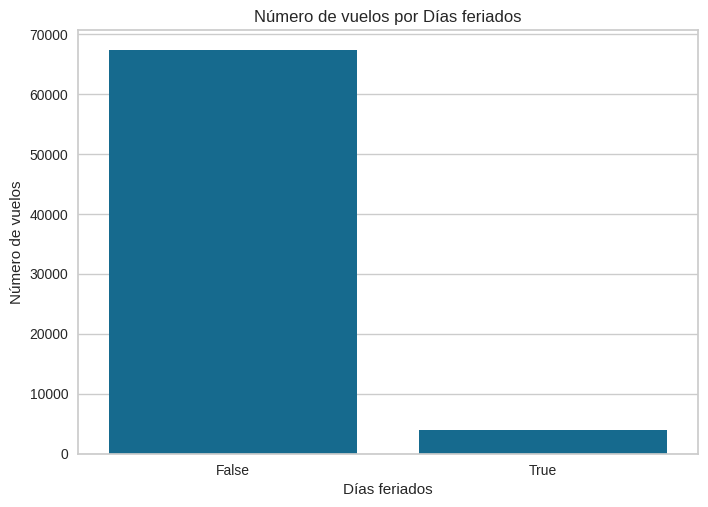

In [15]:
avg_delay=datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs Retraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='is_holiday')
plt.title('Número de vuelos por Días feriados')
plt.xlabel('Días feriados')
plt.ylabel('Número de vuelos')
plt.show()

In [16]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


In [17]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

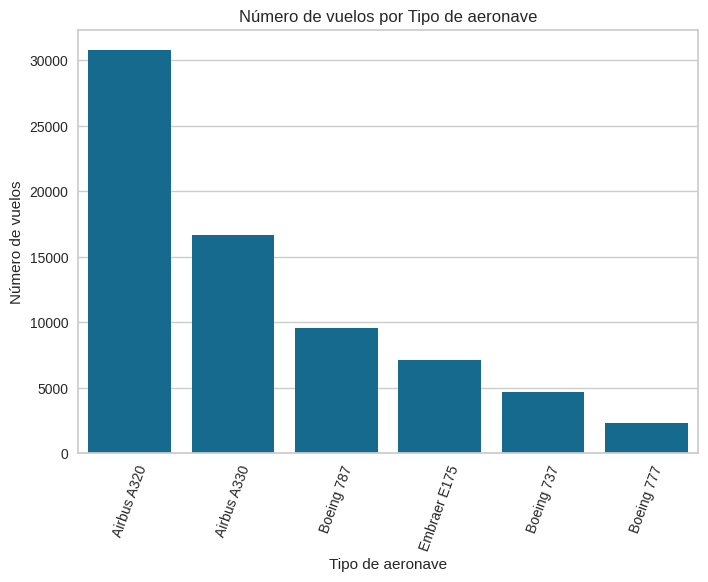

In [18]:
order=datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

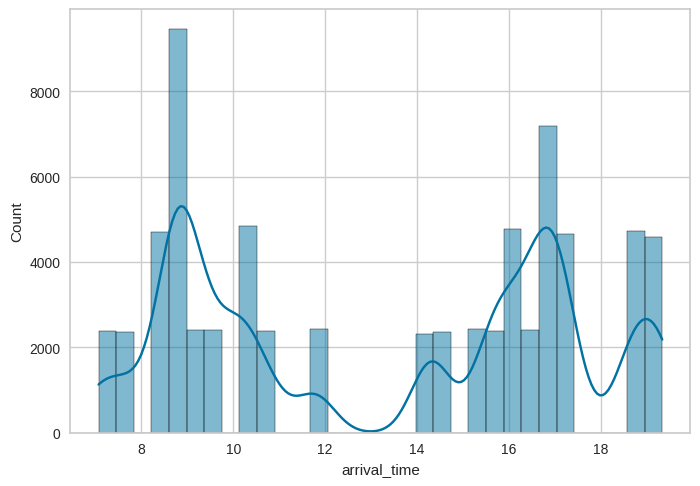

In [19]:
sns.histplot(data=datos, x='arrival_time',kde=True)


https://en.m.wikipedia.org/wiki/Freedman–Diaconis_rule

In [20]:
import numpy as np
def  ancho_bin(df,columna):
  q75,q25=np.percentile(df[columna],[75,25])
  iqr=q75-q25
  ancho= 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

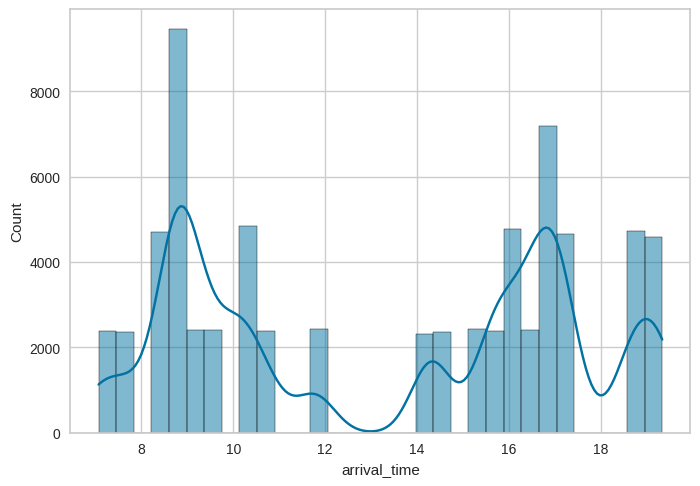

In [21]:
binwith=ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True,binwidth=binwith)

<Axes: xlabel='departure_time', ylabel='Count'>

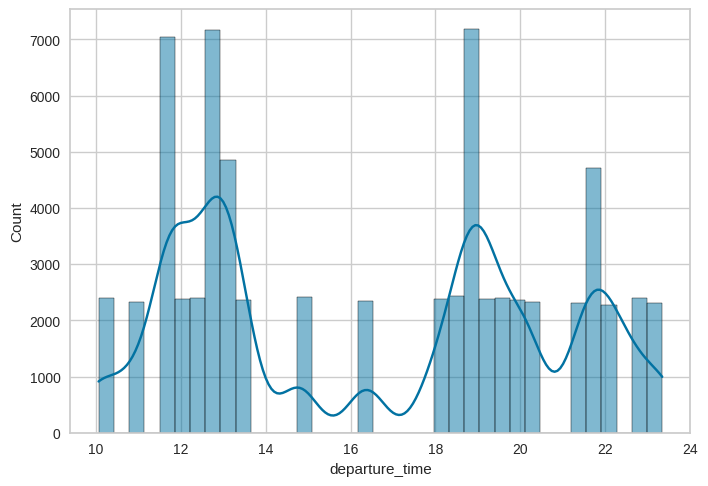

In [22]:
binwith=ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True,binwidth=binwith)

In [23]:
atraso_promedio=datos['delay'].mean()
atraso_mediana=datos['delay'].median()

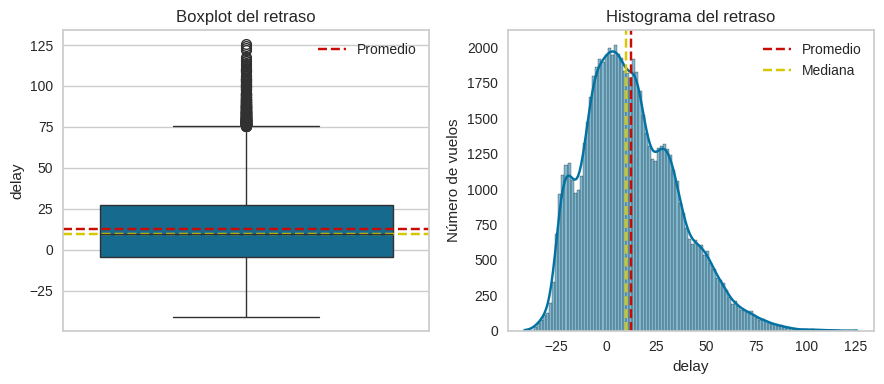

In [24]:
# fig=lienzo ax=ejes
fig, ax=plt.subplots(1,2,figsize=(9,4))
sns.boxplot(data=datos,y='delay',ax=ax[0])
ax[0].set_title('Boxplot del retraso')
ax[0].axhline(y=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[0].axhline(y=atraso_mediana,color='y',linestyle='--')
ax[0].legend()

binwidth=ancho_bin(datos,'delay')
sns.histplot(data=datos,x='delay',ax=ax[1],kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma del retraso')
ax[1].axvline(x=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[1].axvline(x=atraso_mediana,color='y',linestyle='--',label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

# Clase 2

In [25]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [26]:
datos['Date']=datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-1
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-1
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-1


In [27]:
datos['Date']=pd.to_datetime(datos['Date'],format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [28]:
datos['is_weekend']=datos['Date'].dt.weekday.isin([5,6])
datos['day_name']=datos['Date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
24815,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,194,2014,False,11.748168,2014-07-14,False,Monday
10158,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,312,2011,False,-10.895025,2011-11-09,False,Wednesday
19527,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,206,2013,False,57.574988,2013-07-26,False,Friday
58759,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,267,2020,False,1.074346,2020-09-24,False,Thursday
52059,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,185,2019,True,24.854102,2019-07-05,False,Friday


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  Date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
datos['schengen']=datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday']=datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend']=datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
20226,1,BZ,Airbus A320,0,CNU,15.496519,18.496519,253,2013,1,45.071836,2013-09-11,0,Wednesday
37906,6,YE,Boeing 787,1,AUZ,17.033688,19.033688,337,2016,1,37.025156,2016-12-03,1,Saturday
7664,14,BZ,Airbus A330,1,ZQO,7.708301,11.708301,145,2011,0,-13.288051,2011-05-26,0,Thursday


In [32]:
categoricas=['airline','aircraft_type','origin','day_name']
pd.get_dummies(data=datos,columns=categoricas,dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
datos_codificados=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
746,26,0,8.885071,10.885071,49,2010,0,47.342854,2010-02-19,0,...,1,0,0,1,0,0,0,0,0,0
39452,28,0,15.967963,17.967963,75,2017,0,-21.263954,2017-03-17,0,...,0,0,0,1,0,0,0,0,0,0
8164,17,0,16.718722,21.718722,179,2011,0,-2.310647,2011-06-29,0,...,0,0,0,0,0,0,0,0,0,1
38021,21,1,7.065594,10.065594,344,2016,0,27.423561,2016-12-10,1,...,0,0,0,0,0,1,0,0,0,0
2649,13,0,10.172731,13.172731,176,2010,0,-24.777261,2010-06-26,1,...,1,0,0,0,0,1,0,0,0,0


In [35]:
datos_codificados[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [36]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   Date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [37]:
df=datos_codificados.drop(columns=['flight_id','departure_time','day','year','Date'])
df.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Clase 3

https://scikit-learn.org/stable/

In [39]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X= df.drop(columns='delay')
y=df['delay']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_dummy=baseline.predict(X_test)
def calcular_regresion(y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  metricas={
      'RMSE':round((rmse)**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas


In [46]:
resultado_baseline=calcular_regresion(y_test,y_pred_dummy)
resultado_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse**(1/2), 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [50]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 23.1612
Error Absoluto Medio: 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 23.3446
Error Absoluto Medio: 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio: 28.7554
Error Absoluto Medio: 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio: 23.3079
Error Absoluto Medio: 18.4449
R2 Score: -0.0127




In [51]:
from sklearn.ensemble import RandomForestRegressor
modelo=RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred=modelo.predict(X_test)
resultado_rf=calcular_regresion(y_test,ypred)
resultado_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

In [52]:
resultado_rf_=calcular_metricas_regresion(y_test,ypred)
resultado_rf_

{'Raíz del Error Cuadrático Medio': 13.7479,
 'Error Absoluto Medio': 11.0262,
 'R2 Score': 0.6477}

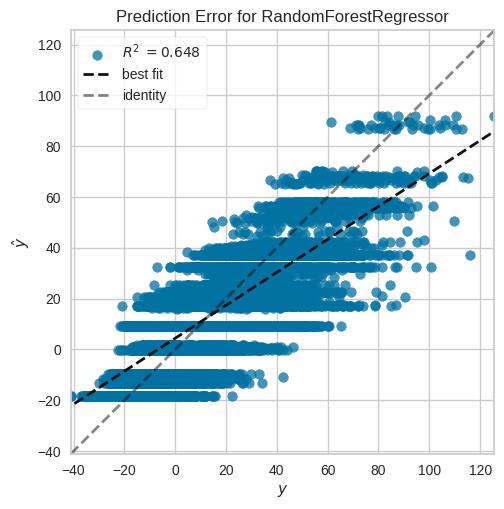

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(modelo)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

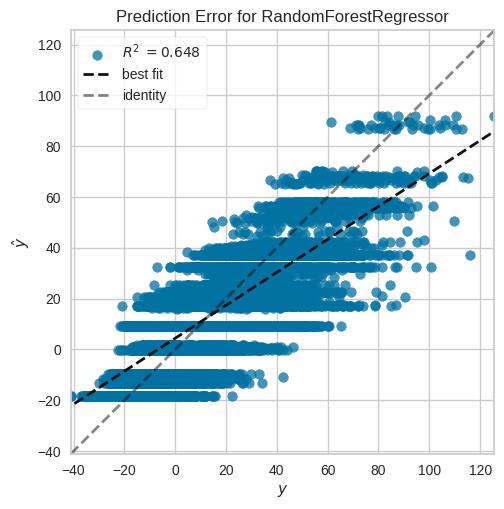

In [62]:
from yellowbrick.regressor import prediction_error
visualizer=prediction_error(modelo, X_train, y_train, X_test, y_test);


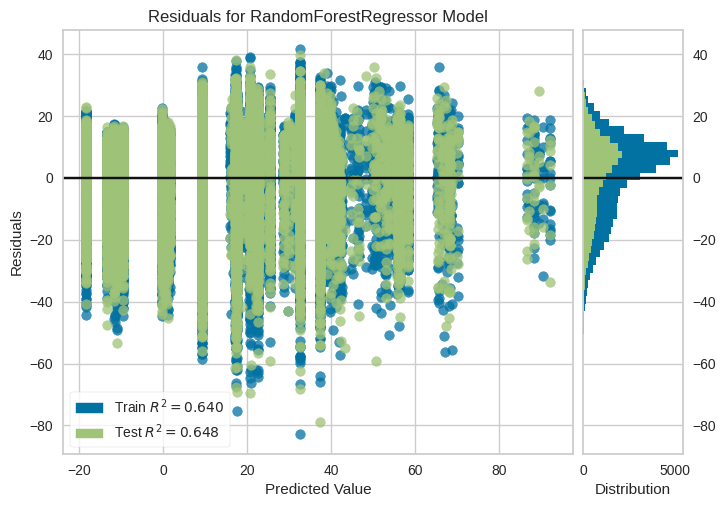

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(modelo)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

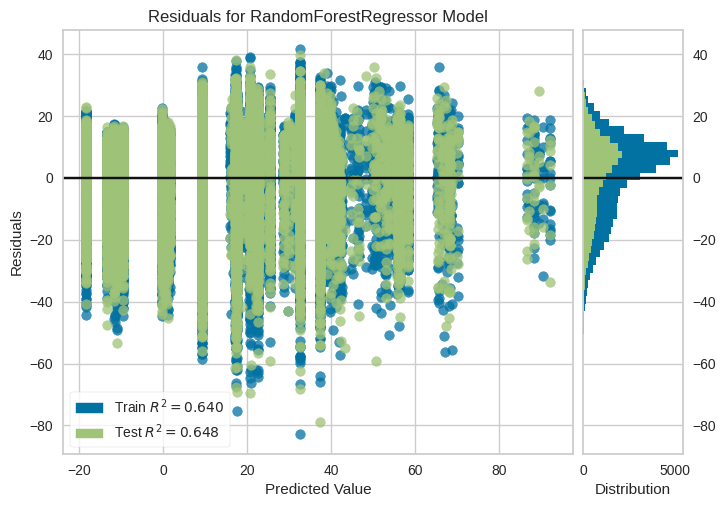

In [65]:
from yellowbrick.regressor import residuals_plot
viz=residuals_plot(modelo, X_train, y_train, X_test, y_test);

